In [1]:
import pathlib
project_path = pathlib.Path().resolve().parent.parent
paths = []

import sys
path = project_path.joinpath("benchmark/third_party/bench-mr/python").as_posix()
if path not in sys.path:
    sys.path.append(path)

import os
os.environ["MPB_BINARY"] = "./benchmark"
os.environ["MPB_PYTHON_BINARY"] = project_path.joinpath("scripts/run_bench_mr.py").as_posix()
os.environ["MPB_BINARY_DIR"] = project_path.joinpath("benchmark/third_party/bench-mr/bin").as_posix()
os.environ["PYTHONPATH"] = "../../../../build/benchmark:" + project_path.as_posix()

scenario_path = project_path.joinpath("benchmark/third_party/bench-mr/bin/moving_ai_scenarios")


import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['pdf.fonttype'] = 42

from plot_env import plot_env
import json
from plot_env import plot_env, plot_env_options
from plot_trajectory import plot_trajectory, plot_nodes, plot_trajectory_options
from color import get_color, get_colors
import matplotlib.pyplot as plt
from mpb import MPB, MultipleMPB
from plot_stats import plot_planner_stats

%config InlineBackend.figure_format='retina'

# Run one experiment

In [2]:
m = MPB()
m["benchmark.moving_ai.active"] = True
m["benchmark.moving_ai.create_border"] = False
i = -3
m["benchmark.moving_ai.start"] = i
m["benchmark.moving_ai.end"] = i + 1
m["benchmark.moving_ai.scenario"] = scenario_path.joinpath("Boston_2_512.map.scen").as_posix() 

m["max_planning_time"] = 100
m["benchmark.planning"]['constrained_onf_planner'] = True
m["steer.car_turning_radius"] = 2
m["sbpl.scaling"] = 1
m.set_planners(['constrained_onf_planner', 'bfmt', 'est', 'prm_star', 'sbpl_mha', 'spars2', 'sst', 'rrt'])
m.run(id="movingai_test_astar", runs=1)

Running MPB with ID movingai_test_astar (log file at movingai_test_astar.log)...


movingai_test_astar:   0%|          | 0/8 [00:00<?, ?it/s]

0

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


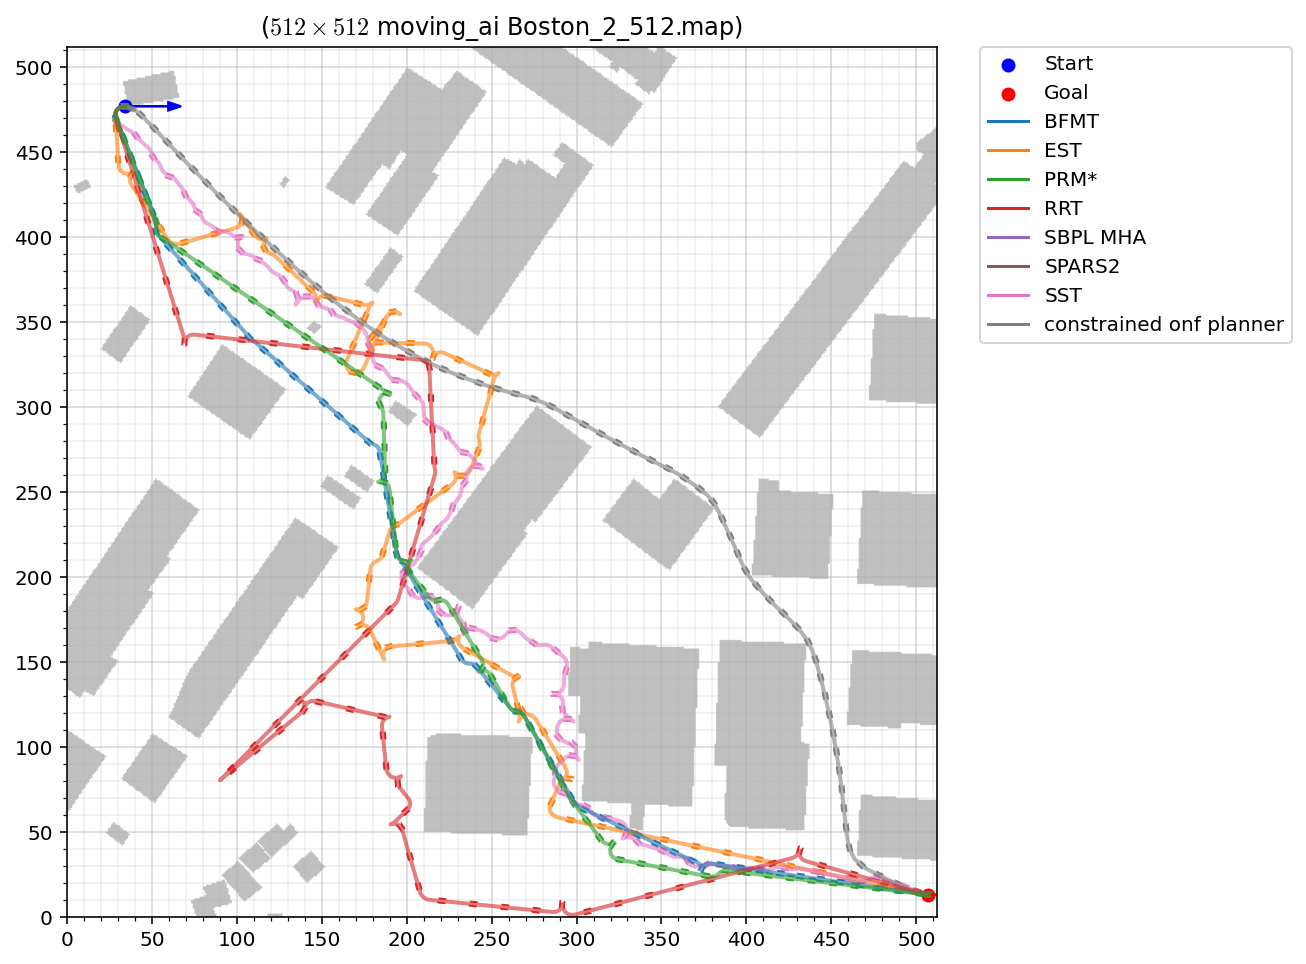

In [3]:
m.visualize_trajectories(draw_start_goal_thetas=True,
                         plot_every_nth_polygon=8,
                         fig_width=8,
                         fig_height=8,
                         silence=True,
                         save_file="plots/movingai_experiment.pdf",
                         num_colors=10)

# Run pool

In [18]:
only_scen_files

['Boston_2_512.map.scen',
 'Denver_1_256.map.scen',
 'NewYork_1_512.map.scen',
 'Boston_1_1024.map.scen',
 'Berlin_0_256.map.scen']

Available memory: 8.26 GB, limiting each MPB process to 62.5% usage (5.16 GB).
Creating pool of 1 processes.
Running MPB with ID movingai_test_astar_0 (log file at movingai_test_astar/movingai_test_astar_0.log)...


movingai_test_astar_0:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 0 (movingai_test_astar_0) finished successfully.
Running MPB with ID movingai_test_astar_1 (log file at movingai_test_astar/movingai_test_astar_1.log)...


movingai_test_astar_1:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 1 (movingai_test_astar_1) finished successfully.
Running MPB with ID movingai_test_astar_2 (log file at movingai_test_astar/movingai_test_astar_2.log)...


movingai_test_astar_2:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 2 (movingai_test_astar_2) finished successfully.
Running MPB with ID movingai_test_astar_3 (log file at movingai_test_astar/movingai_test_astar_3.log)...


movingai_test_astar_3:   0%|          | 0/1 [00:00<?, ?it/s]

Killed movingai_test_astar_3 with planner constrained_onf_planner after 90.00s exceeded timeout.
Benchmark 3 (movingai_test_astar_3) finished successfully.
Running MPB with ID movingai_test_astar_4 (log file at movingai_test_astar/movingai_test_astar_4.log)...


movingai_test_astar_4:   0%|          | 0/1 [00:00<?, ?it/s]

Benchmark 4 (movingai_test_astar_4) finished successfully.
All benchmarks succeeded.


True

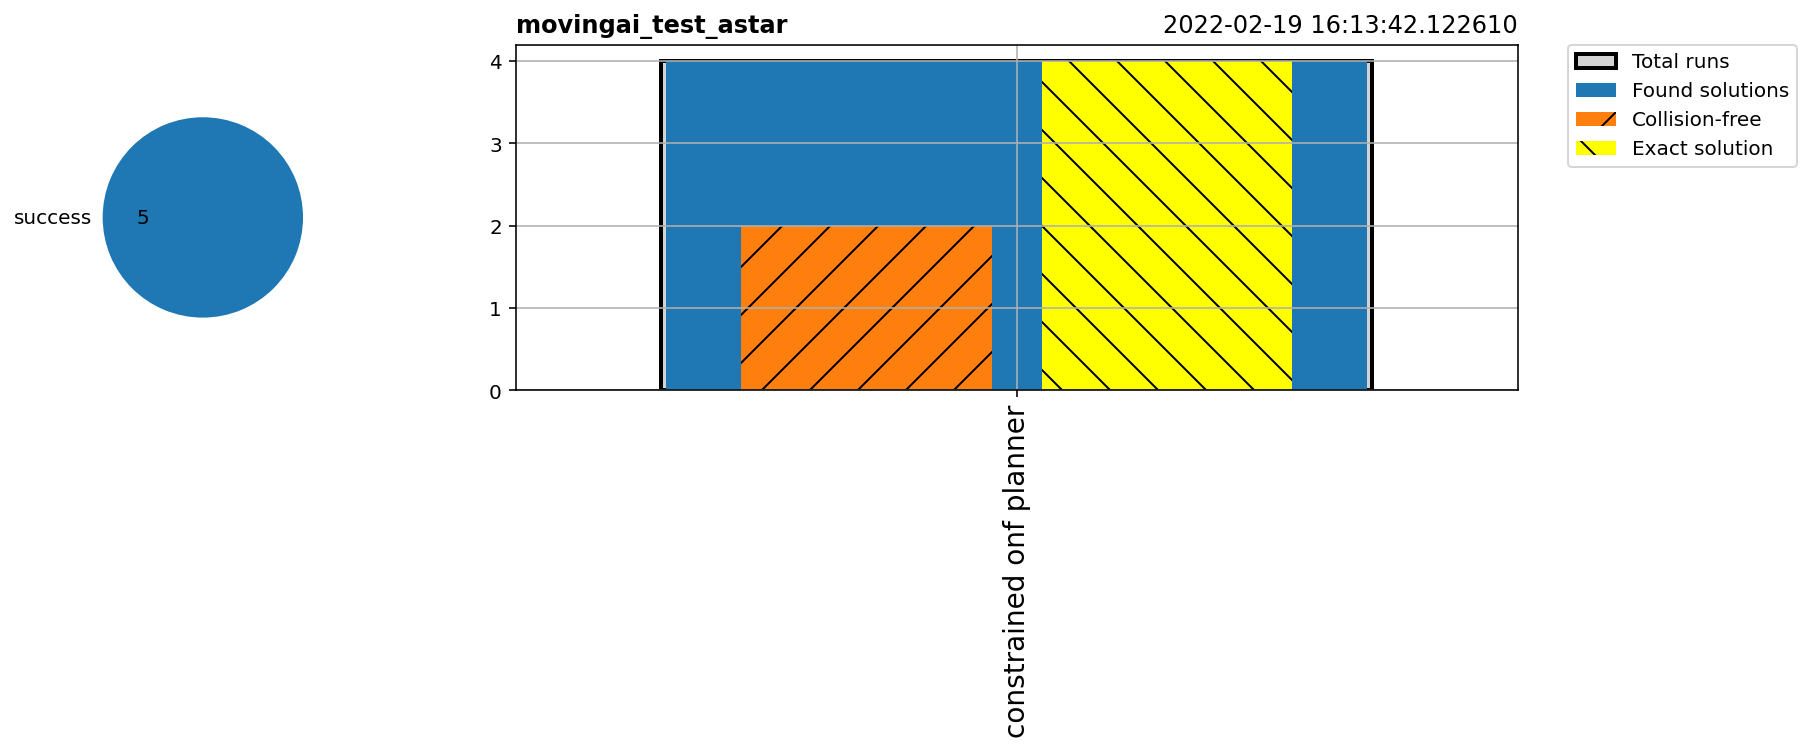

In [19]:
time_limit_multiplier = 3
steer_function_times = [
    ('reeds_shepp', 15 * time_limit_multiplier), 
    ('dubins', 60 * time_limit_multiplier),    
    ('cc_reeds_shepp', 180 * time_limit_multiplier),    
    ('posq', 120 * time_limit_multiplier)
]

env = os.environ
env["MPLBACKEND"] = "TkAgg"
pool = MultipleMPB()

only_scen_files = [f for f in os.listdir(scenario_path) if f.endswith('.scen')]
scene = only_scen_files[0]
for scene in only_scen_files:
# for i in range(3):
    m = MPB()
    m["env.collision.collision_model"] = 0
    m["benchmark.moving_ai.active"] = True
    m["benchmark.moving_ai.create_border"] = False
    i = -3
    m["benchmark.moving_ai.start"] = i
    m["benchmark.moving_ai.end"] = i + 1
    m["benchmark.moving_ai.scenario"] = scenario_path.joinpath(scene).as_posix() 

    m["max_planning_time"] = steer_function_times[0][1]
    m["benchmark.planning"]['constrained_onf_planner'] = True
    m["steer.car_turning_radius"] = 2
    m["sbpl.scaling"] = 1
    m.set_steer_functions([steer_function_times[0][0]])
    # m.set_planners(['constrained_onf_planner', 'bfmt', 'est', 'prm_star', 'sst', 'rrt'])
    m.set_planners(['constrained_onf_planner'])
    pool.benchmarks.append(m)
    
pool.run_parallel(id="movingai_test_astar", runs=1, processes=1)


No results file exists for MPB <mpb.MPB object at 0x7fa238c162b0>. Skipping.
Successfully merged [movingai_test_astar/movingai_test_astar_0_results.json, movingai_test_astar/movingai_test_astar_1_results.json, movingai_test_astar/movingai_test_astar_2_results.json, movingai_test_astar/movingai_test_astar_3_results.json, movingai_test_astar/movingai_test_astar_4_results.json] into movingai_test_astar/movingai_test_astar_all.json.
Visualizing movingai_test_astar/movingai_test_astar_all.json...


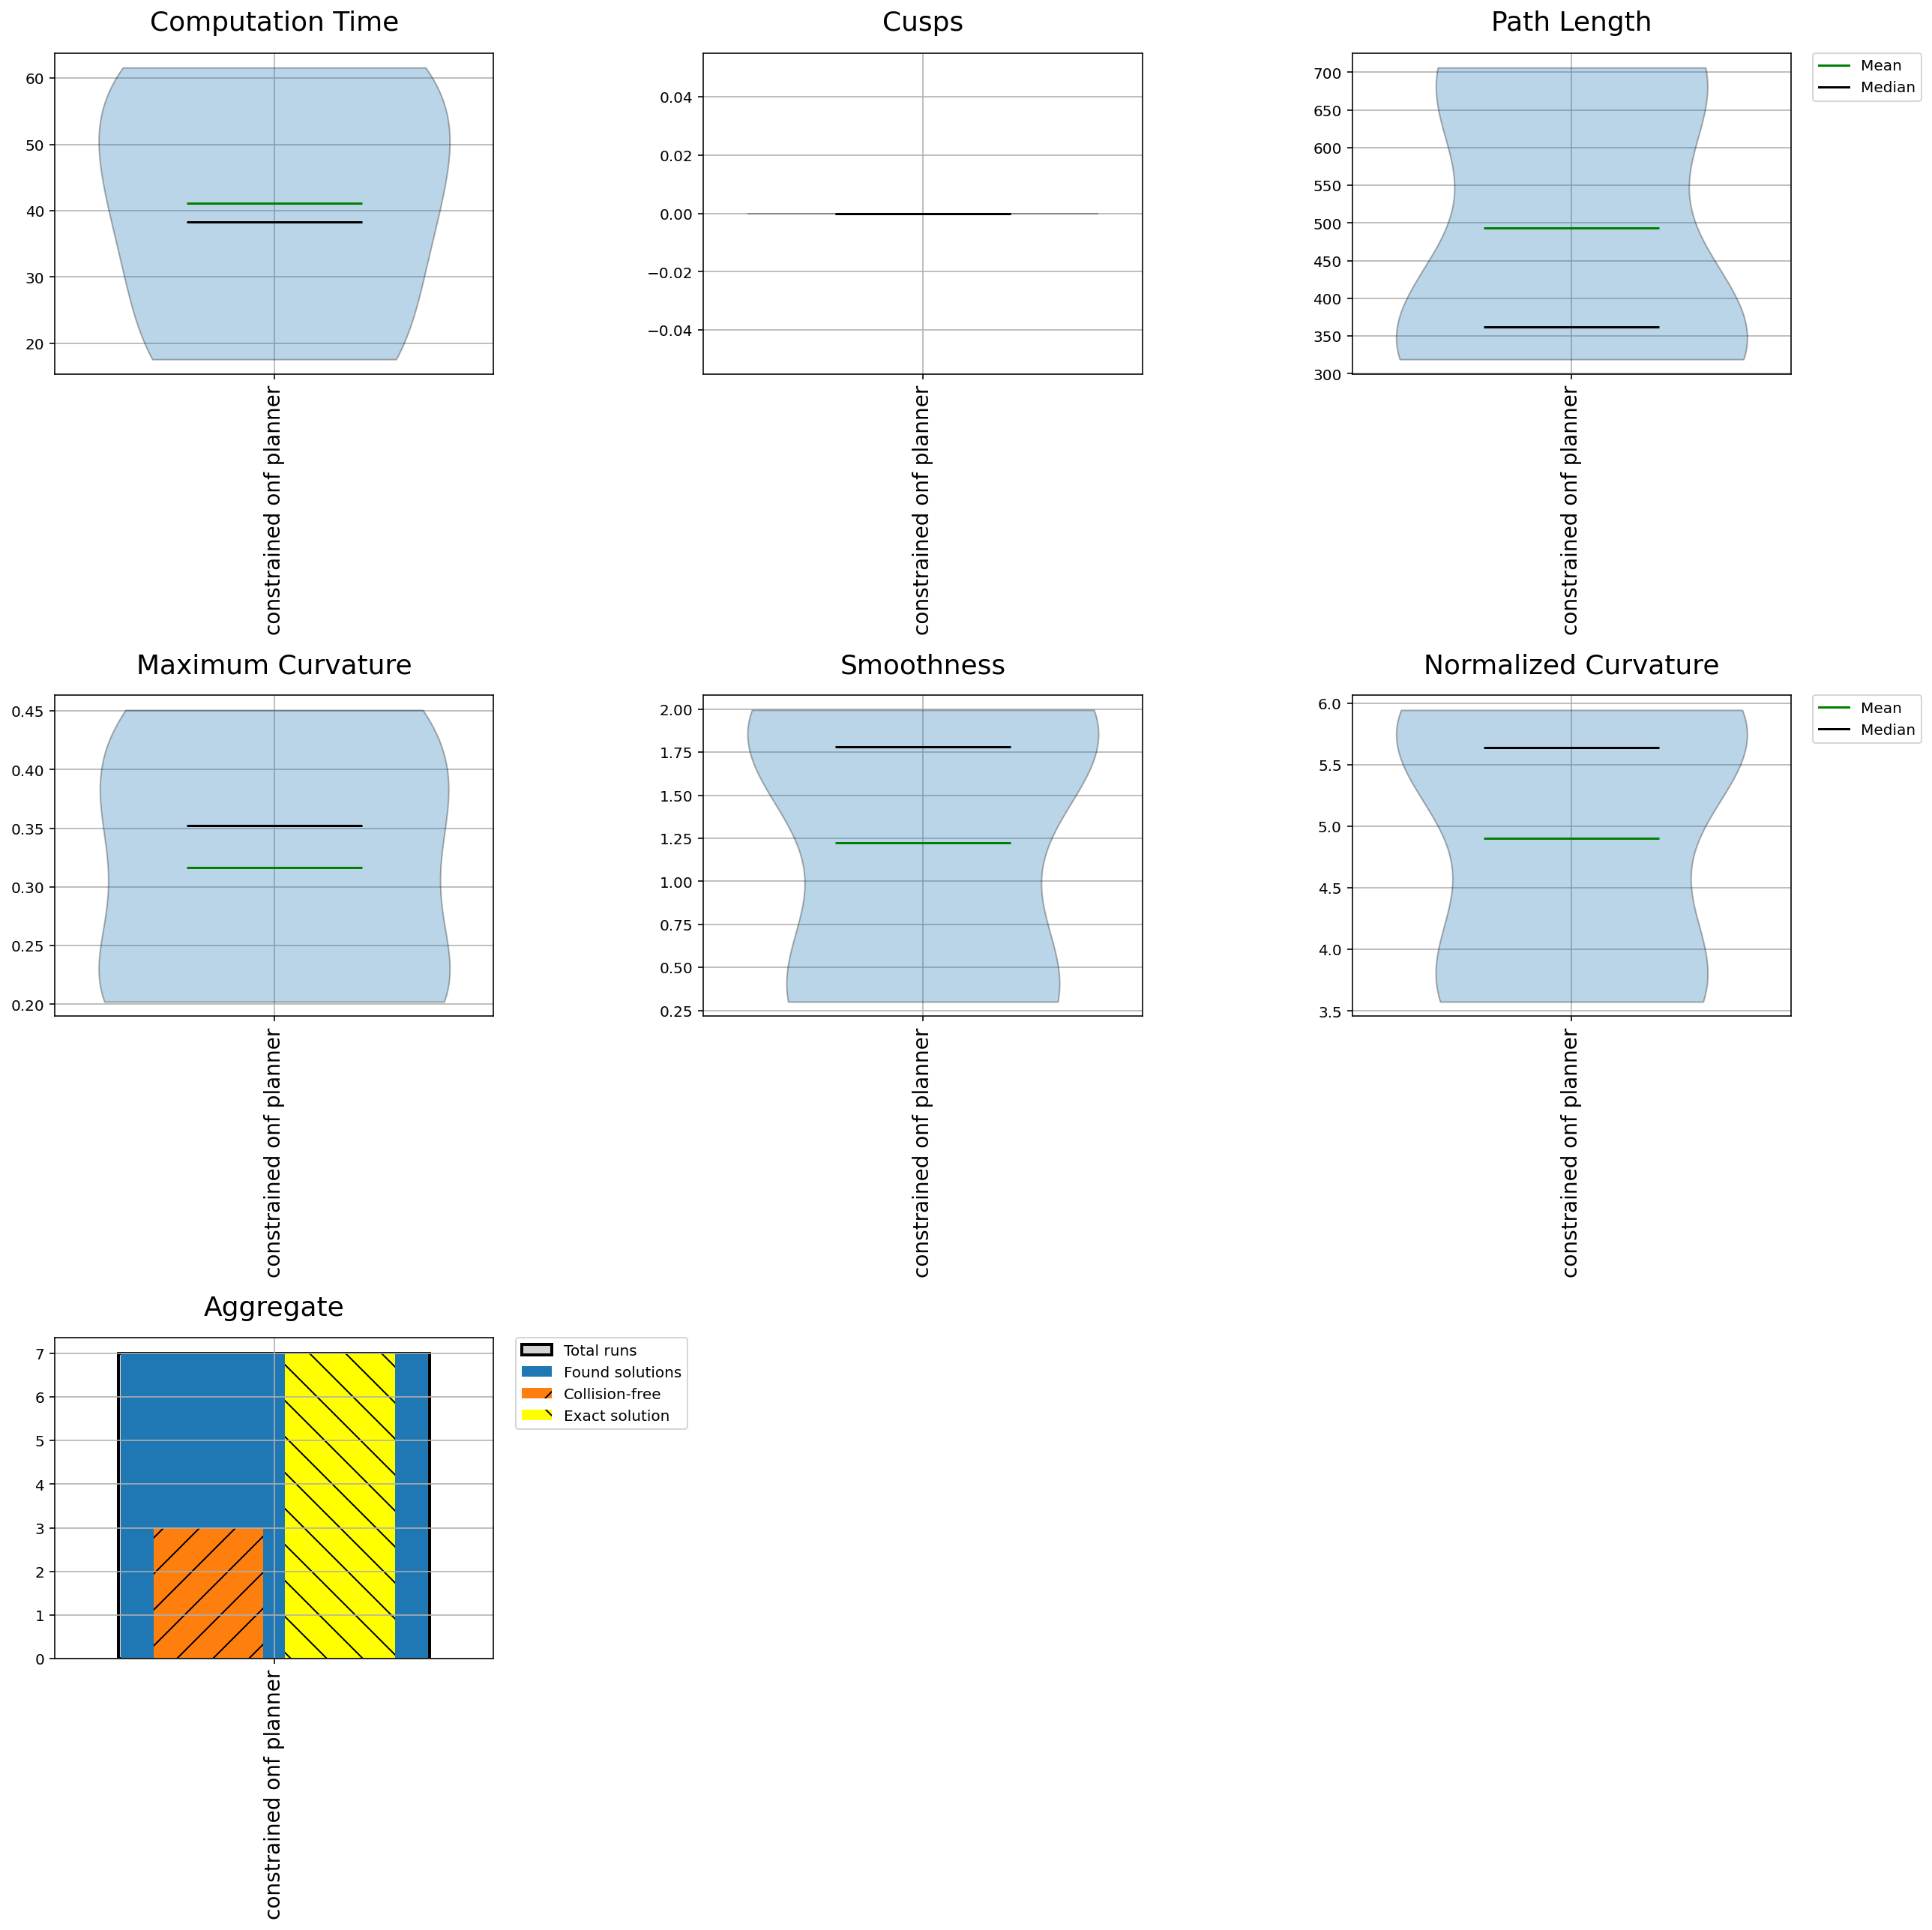

In [22]:
result = "movingai_test_astar/movingai_test_astar_all.json"
pool.merge(result, make_separate_runs=True)
plot_planner_stats(result, metrics="planning_time, cusps, path_length, max_curvature, smoothness, normalized_curvature, aggregate")

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very l

No results file exists for MPB movingai_test_astar_3.


'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp


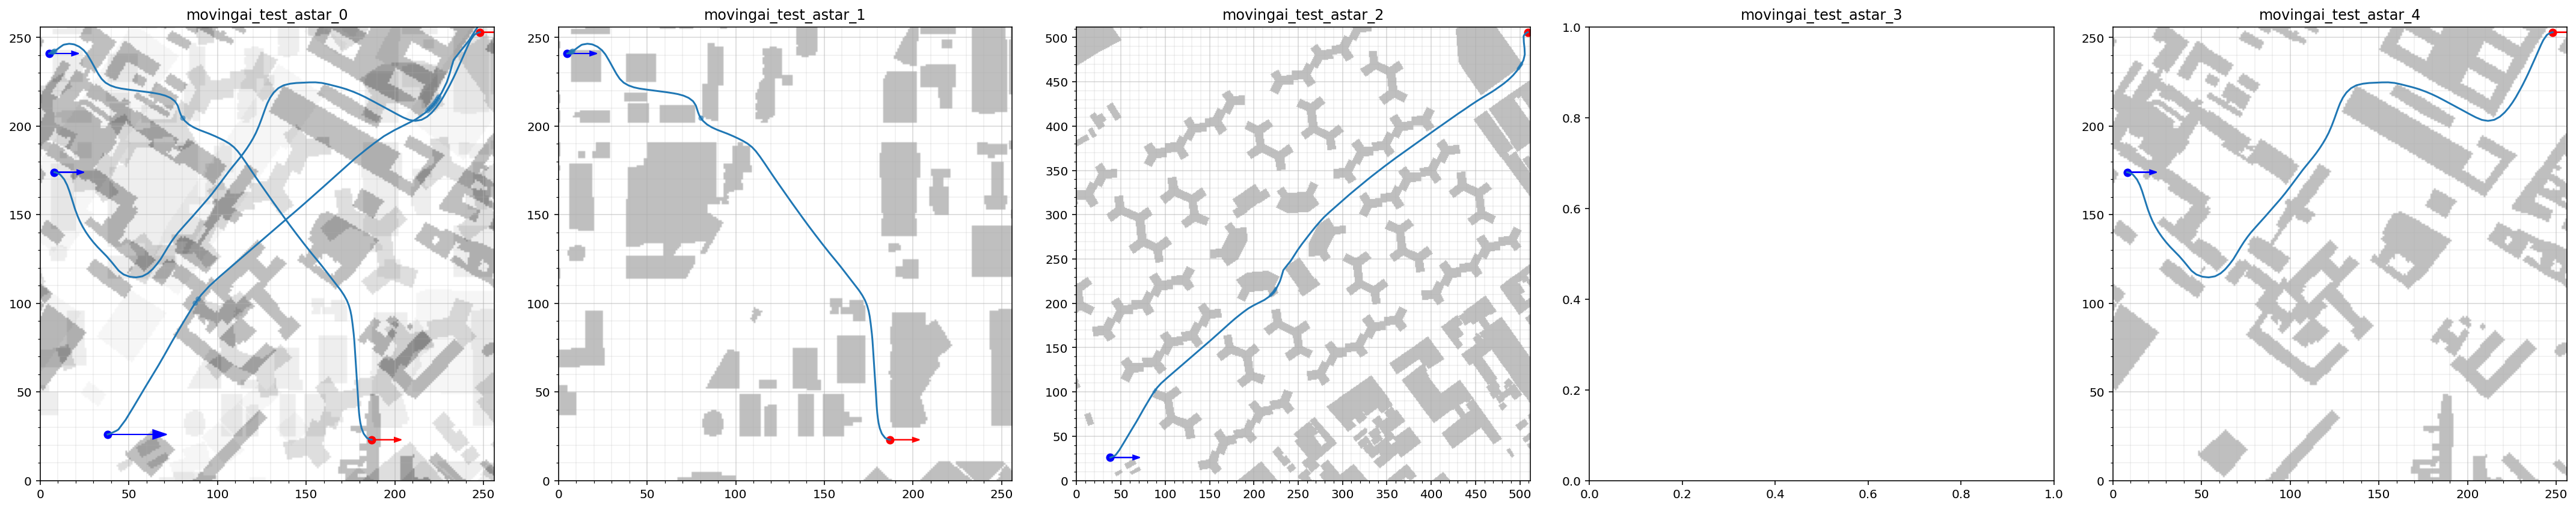

In [23]:
pool.visualize_trajectories(draw_start_goal_thetas=True,
                            plot_every_nth_polygon=8,
                            fig_width=8,
                            fig_height=8,
                            silence=True,
                            save_file="plots/movingai_experiment.pdf",
                            num_colors=10)

In [24]:
from utils import latexify
from table import latex_table
total_filename = "movingai_test_astar/movingai_test_astar_all.json"
metrics=['path_found',
         'planning_time',
         'path_length',
         'max_curvature',
         'cusps',
         'smoothness',
         'normalized_curvature']

header = 'Planner & '
for j in range(len(metrics)):
    header += metrics[j].replace('_', ' ') + (' & ' if j < len(metrics) - 1 else ' \\\\')

print('\\begin{tabular}{*{%s}{|l}|}' % (len(metrics)+1))
print('\\hline')
print(header.replace('mean %cleararing distance', 'mean clearing').replace('max curvature', 'max curv').replace('normalized curvature', 'normal. curv'))
print('\\hline')
print(latex_table(total_filename, metrics=metrics).replace('constrained onf planner', 'Ours').replace('N / A', '-'))
print('\\hline')
print('\\end{tabular}')

\begin{tabular}{*{8}{|l}|}
\hline
Planner & path found & planning time & path length & max curv & cusps & smoothness & normal. curv \\
\hline
Ours                  & % Ours
	3/7 &
	41.13 $\pm$ 17.34 &
	492.84 $\pm$ 176.96 &
	0.32 $\pm$ 0.11 &
	0 &
	1.22 &
	4.90 $\pm$ 1.04 %
\\

\hline
\end{tabular}


/root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/python/table.py:71: RuntimeWarning: invalid value encountered in double_scalars
  shown_mu = mu / metric_properties[metric]["max"]


## Some other staff

In [10]:
path = project_path.as_posix()
if path not in sys.path:
    sys.path.append(path)
    
path = project_path.joinpath("build/benchmark").as_posix()
if path not in sys.path:
    sys.path.append(path)
os.chdir(project_path.joinpath("benchmark/third_party/bench-mr/bin").as_posix())
from neural_field_optimal_planner.benchmark_adapter import BenchmarkAdapter
from neural_field_optimal_planner.benchmark_adapter.benchmark_collision_checker import BenchmarkCollisionChecker
from neural_field_optimal_planner.utils.position2 import Position2
from neural_field_optimal_planner.astar.jps import JPS
import numpy as np

In [11]:
config_path = project_path.joinpath("notebooks/benchmark/movingai_test_astar_config.json").as_posix()
benchmark = BenchmarkAdapter(config_path)
collision_checker = BenchmarkCollisionChecker(benchmark, benchmark.bounds())

Info:    Loaded 1850 Moving AI scenarios from /root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/bin/moving_ai_scenarios/Boston_2_512.map.scen.
Loaded scenario /root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/bin/moving_ai_scenarios/Boston_2_512.map.scen #184 (with map /root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/bin/moving_ai_scenarios/Boston_2_512.map 512x512 from [34 477] to [507 13], opt-l: 737.247)
SVG group: using offset_x=-65.1531  offset_y=-139.301
Info:    Loaded polygon robot model from polygon_mazes/car.svg with 22 vertices.
Info:    	Bounds: [-2.29 -1.11] -- [1.96 1.33]
Info:    Loaded 1850 Moving AI scenarios from /root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/bin/moving_ai_scenarios/Boston_2_512.map.scen.
Loaded scenario /root/code/pytorch-motion-planner/benchmark/third_party/bench-mr/bin/moving_ai_scenarios/Boston_2_512.map.scen #184 (with map /root/code/pytorch-motion-planner/benchmark/third_party/bench

Error:   Random number generation already started. Changing seed now will not lead to deterministic sampling.
         at line 78 in /root/code/ompl/src/ompl/util/src/RandomNumbers.cpp


 Loaded polygon robot model from polygon_mazes/car.svg with 22 vertices.
Info:    	Bounds: [-2.29 -1.11] -- [1.96 1.33]
global::settings.ompl.state_space->hasDefaultProjection() ? false
Info:    Initialized steer function Reeds-Shepp.


In [12]:
goal = benchmark.goal().as_vec()
start = benchmark.start().as_vec()
resolution = 0.5

In [13]:
boundaries = collision_checker.get_boundaries()
x_cells = int((boundaries[1] - boundaries[0]) // resolution) + 1
y_cells = int((boundaries[3] - boundaries[2]) // resolution) + 1
start_x_cell = int((start[0] - boundaries[0]) // resolution)
start_y_cell = int((start[1] - boundaries[2]) // resolution)
goal_x_cell = int((goal[0] - boundaries[0]) // resolution)
goal_y_cell = int((goal[1] - boundaries[2]) // resolution)
x, y = np.meshgrid(range(x_cells), range(y_cells))
x = x.reshape(-1) * resolution + resolution / 2 + boundaries[0]
y = y.reshape(-1) * resolution + resolution / 2 + boundaries[2]
positions = Position2(x, y, np.zeros_like(x) + np.pi / 2)
collisions = collision_checker.check_collision(positions)
matrix = collisions.reshape(x_cells, y_cells)
# planner = JPS(matrix, jps=False)
# path = planner.find_path((start_x_cell, start_y_cell), (goal_x_cell, goal_y_cell))
# path[:, 0] = path[:, 0] * resolution + resolution / 2 + boundaries[0]
# path[:, 1] = path[:, 1] * resolution + resolution / 2 + boundaries[2]
# return path

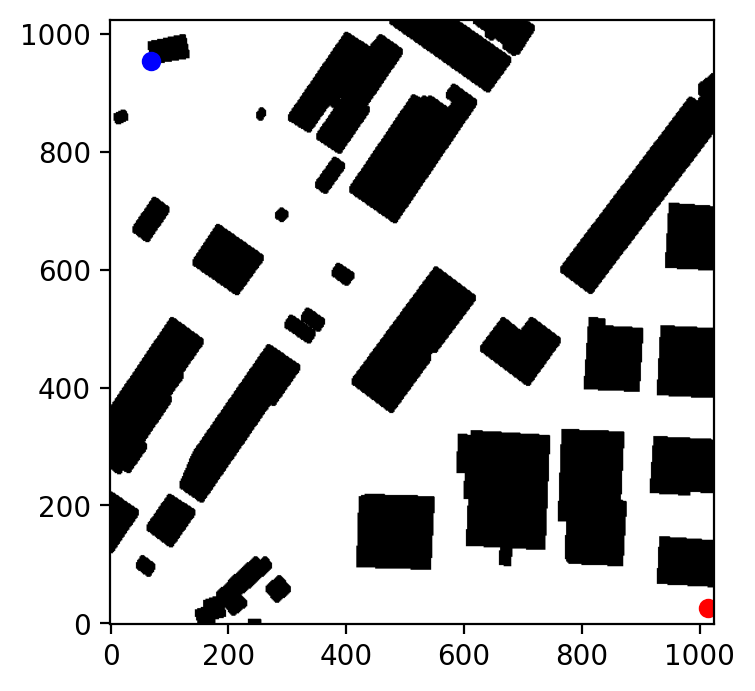

In [16]:
plt.figure(dpi=100)
plt.scatter([start_x_cell], [start_y_cell], color="blue")
plt.scatter([goal_x_cell], [goal_y_cell], color="red")
plt.imshow(1 - matrix, cmap="gray", origin="lower")

In [17]:
planner = JPS(matrix, jps=False)
path = planner.find_path((start_y_cell, start_x_cell), (goal_y_cell, goal_x_cell))

solution found with: 371096 nodes expanded.
with path length: 1204


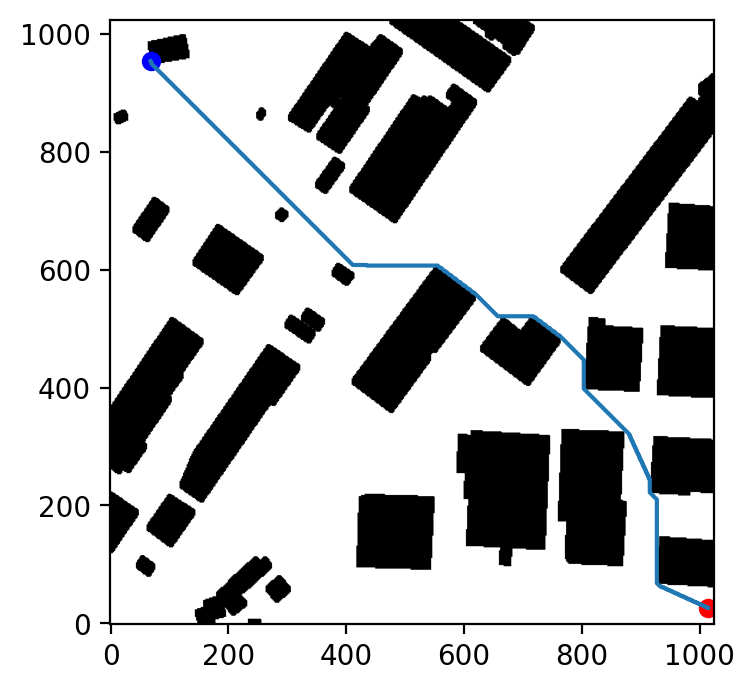

In [18]:
plt.figure(dpi=100)
plt.scatter([start_x_cell], [start_y_cell], color="blue")
plt.scatter([goal_x_cell], [goal_y_cell], color="red")
plt.plot(path[:, 1], path[:, 0])
plt.imshow(1 - matrix, cmap="gray", origin="lower")

## Experiments

In [69]:
from copy import deepcopy
from mpb import MPB_BINARY_DIR, MPB, MultipleMPB
from plot_stats import plot_planner_stats, plot_smoother_stats
from utils import latexify
from table import latex_table
from definitions import *
import matplotlib as mpl
import sys, os
def benchmark_moving_ai(scenario: str,
                        num_scenarios: int,
                        steer_function: str,
                        time_limit: float = 15,
                        planners: planners=[]):
    scenario_file = f'{scenario_path.as_posix()}/{scenario}.map.scen'
    if not os.path.exists(scenario_file):
        raise Exception("Scenario file \"%s\" could not be found." % scenario_file)
    bench = "moving_ai_%s_%s" % (scenario, steer_function)
    total_filename = "%s/_total.json" % bench

    config = MPB.get_config()
    config["benchmark.moving_ai.active"] = True
    config["max_planning_time"] = time_limit
    config["benchmark.moving_ai.create_border"] = False
    # use point-based collision model for MovingAI scenarios
    config["env.collision.collision_model"] = 0

    pool = MultipleMPB()
    for i in range(num_scenarios):
        j = -3
        m = MPB()
        m["benchmark.moving_ai.active"] = True
        m["benchmark.moving_ai.create_border"] = False

        m["benchmark.moving_ai.start"] = i
        m["benchmark.moving_ai.end"] = i + 1
        m["benchmark.moving_ai.scenario"] = scenario_path.joinpath(scene).as_posix() 
        # config["benchmark.moving_ai.start"] = j - num_scenarios
        # config["benchmark.moving_ai.end"] = j - num_scenarios + 1
        # config["benchmark.moving_ai.scenario"] = scenario_file    
        m["max_planning_time"] = 100
        m["benchmark.planning"]['constrained_onf_planner'] = True
        m["steer.car_turning_radius"] = 2
        m["sbpl.scaling"] = 1
        m.update(deepcopy(config))
        m.set_steer_functions([steer_function])
        m.set_planners(['constrained_onf_planner', 'sbpl_mha', 'ompl_shortcut'])
        m.set_robot_models_functions(['kinematic_car', 'kinematic_single_track'])
        m.set_exact_goal_radius(1.0)
        pool.benchmarks.append(m)
        j+=1
    run_result = pool.run_parallel(bench, processes=20, limit_memory=True)

    # plot trajectories
    try:
        pool.visualize_trajectories(show_legend=True, fig_width=8, fig_height=8)
        plt.savefig("%s/%s_trajectories.pdf" % (bench, bench), bbox_inches='tight')
    except Exception as e:
        print("Error while visualizing trajectories:", e, file=sys.stderr)

    MPB.merge(pool.benchmarks, total_filename, make_separate_runs=True)

    # plot planner stats
    try:        
        plot_planner_stats(total_filename, save_file="%s/%s_stats.pdf" % (bench, bench))
    except Exception as e:
        print("Error while plotting planner statistics:", e, file=sys.stderr)

    return run_result